# Pretratamiento de Datos

## Autores: Joaquín Martirena, Domenico Federico y Felipe Guasch

## Dataset de Permisos de Construcción

Este conjunto de datos recopila información sobre **permisos de construcción emitidos en la ciudad de San Francisco**.  
Incluye 32 variables que describen cada permiso: identificadores únicos, tipo y estado del permiso, fechas clave (creación, emisión, finalización, vencimiento), costos estimados y revisados, uso existente y propuesto de la propiedad, características de la construcción, así como su localización geográfica y administrativa.  

En total, el dataset contiene **198910**, acompañados de un archivo de **metadatos** que documenta el significado de cada variable.  
Su análisis permite estudiar la dinámica de la actividad constructiva, detectar patrones y desarrollar modelos predictivos relacionados con costos, tiempos o estados de los permisos.

# Resumen de Variables del Dataset

1. **Permit Number**  
   Número único asignado al permiso en el momento de su registro.

2. **Permit Type**  
   Tipo de permiso representado en forma numérica.

3. **Permit Type Definition**  
   Definición textual del tipo de permiso (por ejemplo: *"otc alterations permit"*).

4. **Permit Creation Date**  
   Fecha en la que se creó el permiso.

5. **Block**  
   Identificador de bloque asociado a la dirección del proyecto.

6. **Lot**  
   Número de lote correspondiente dentro del bloque.

7. **Street Number / Street Name / Street Suffix**  
   Dirección donde se realiza la obra (número, nombre de calle y sufijo como “St”, “Ave”, etc.).

8. **Unit / Unit Suffix**  
   Identificación específica de una unidad dentro de la dirección (ejemplo: apartamento).

9. **Description**  
   Breve descripción del tipo de trabajo o construcción solicitado.

10. **Current Status**  
    Estado actual del permiso (ejemplo: *“Issued”*, *“Completed”*).

11. **Current Status Date**  
    Fecha de actualización del estado actual.

12. **Filed Date**  
    Fecha en la que se presentó la solicitud.

13. **Issued Date**  
    Fecha en que el permiso fue oficialmente emitido.

14. **Completed Date**  
    Fecha en que el trabajo autorizado se completó.

15. **First Construction Document Date**  
    Fecha de presentación del primer documento de construcción relacionado.

16. **Structural Notification**  
    Indicador de notificación estructural (si corresponde).

17. **Number of Existing Stories / Number of Proposed Stories**  
    Número de pisos existentes en la construcción y número propuesto tras la obra.

18. **Voluntary Soft-Story Retrofit**  
    Indica si la obra corresponde a un refuerzo voluntario de estructuras débiles.

19. **Fire Only Permit**  
    Señala si el permiso es exclusivamente para temas de protección contra incendios.

20. **Permit Expiration Date**  
    Fecha de vencimiento del permiso.

21. **Estimated Cost / Revised Cost**  
    Costo estimado inicialmente y costo revisado de la obra.

22. **Existing Use / Existing Units**  
    Uso actual de la propiedad (ejemplo: residencial, comercial) y número de unidades existentes.

23. **Proposed Use / Proposed Units**  
    Uso propuesto tras la construcción y número de unidades proyectadas.

24. **Plansets**  
    Número de planos o documentos técnicos asociados.

25. **TIDF Compliance**  
    Cumplimiento con el *Transit Impact Development Fee*.

26. **Existing Construction Type / Proposed Construction Type**  
    Tipo de construcción existente y tipo propuesto tras la modificación.

27. **Site Permit**  
    Indica si el registro corresponde a un permiso de obra principal (*site permit*).

28. **Supervisor District**  
    Distrito administrativo al que pertenece la obra.

29. **Neighborhoods - Analysis Boundaries**  
    Barrio o zona según delimitaciones oficiales de análisis.

30. **Zipcode**  
    Código postal de la dirección de la obra.

31. **Location**  
    Coordenadas geográficas (latitud, longitud) de la obra.

32. **Record ID**  
    Identificador interno único del registro.

### Se importan las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np

### Se cargan los datos del CSV utilizando la librería Pandas

In [2]:
df = pd.read_csv('../data/permisos_construccion_2.csv', low_memory=False)

### Dataset Variables

In [3]:
from IPython.display import HTML

#Test
variables = df.columns.tolist()
print(variables)

html_table = df.head(0).to_html(index=False, escape=False)
HTML(html_table)


['Permit Number', 'Permit Type', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit', 'Unit Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Structural Notification', 'Number of Existing Stories', 'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Existing Construction Type Description', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location', 'Record ID']


Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


## Analisis Exploratorio

### Total de filas
Se obtiene la cantidad total de registros en el dataset:

```python
total_filas = len(df)
```

---

In [4]:
df


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M788927,8,otc alterations permit,05/23/2017,0215,001,1333,NaN,jOnEs,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.79362102799777, -122.41488237355445)",1464153232862
1,201305318356,8,otc alterations permit,05/31/2013,1810,017A,1483,NaN,43rD,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.759041020475465, -122.50286985467523)",1306559115258
2,201705106205,8,otc alterations permit,05/10/2017,5700,027,431,NaN,pReNtIsS,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94110.0,"(37.73778863007536, -122.41197863877355)",1462579187173
3,201410279983,8,otc alterations permit,10/27/2014,0661,005,2020,NaN,bUsH,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Pacific Heights,94115.0,"(37.78762264983362, -122.43099126735969)",136037778128
4,201310280388,8,otc alterations permit,10/28/2013,3642,051A,871,NaN,cApP,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75275550565926, -122.41707462095194)",1322242163712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198905,201604053958,3,additions alterations or repairs,04/05/2016,7295,021,3251,NaN,20tH,Av,...,2.0,constr type 2,2.0,constr type 2,NaN,7.0,Lakeshore,94132.0,"(37.728556952954136, -122.47676641508518)",1418495226171
198906,201510270880,8,otc alterations permit,10/27/2015,4009,001A,1919,NaN,mArIpOsA,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Potrero Hill,94107.0,"(37.76328445631136, -122.40287014554292)",1400885168656
198907,201607293741,8,otc alterations permit,07/29/2016,4262,020,1341,NaN,sAn bRuNo,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Mission,94110.0,"(37.75260530951628, -122.40400191084352)",1431897172643
198908,201701066691,8,otc alterations permit,01/06/2017,0146,007,660,NaN,bRoAdWaY,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Chinatown,94133.0,"(37.79800446861674, -122.4080339831039)",1449660232064


### Observar las primeras n filas

In [5]:
n = 5
df.head(n)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M788927,8,otc alterations permit,05/23/2017,0215,001,1333,NaN,jOnEs,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.79362102799777, -122.41488237355445)",1464153232862
1,201305318356,8,otc alterations permit,05/31/2013,1810,017A,1483,NaN,43rD,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.759041020475465, -122.50286985467523)",1306559115258
2,201705106205,8,otc alterations permit,05/10/2017,5700,027,431,NaN,pReNtIsS,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94110.0,"(37.73778863007536, -122.41197863877355)",1462579187173
3,201410279983,8,otc alterations permit,10/27/2014,0661,005,2020,NaN,bUsH,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Pacific Heights,94115.0,"(37.78762264983362, -122.43099126735969)",136037778128
4,201310280388,8,otc alterations permit,10/28/2013,3642,051A,871,NaN,cApP,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75275550565926, -122.41707462095194)",1322242163712


## Evaluación de Datos Faltantes y Duplicados

En esta sección se cuantifica la existencia de valores nulos y filas duplicadas en el dataset, 
y se calcula el porcentaje que representan sobre el total de filas.

---

### 1. Datos faltantes
- **`df.isnull().sum()`**: cuenta cuántos valores nulos (`NaN`) hay en cada columna.  
- **`.sum()`** aplicado al resultado anterior da el total de valores faltantes en todo el dataset.  
- Se calcula el **porcentaje** sobre el total de celdas (`filas * columnas`).

```python
faltantes = df.isnull().sum()
faltantes_total = faltantes.sum()
faltantes_pct = (faltantes_total / (total_filas * df.shape[1])) * 100
```

---

### 2. Filas duplicadas
- **`df.duplicated()`**: devuelve un booleano para cada fila indicando si está repetida.  
- **`.sum()`** sobre ese resultado cuenta la cantidad total de filas duplicadas.  
- Se calcula el **porcentaje** sobre el total de filas.

```python
duplicados_total = df.duplicated().sum()
duplicados_pct = (duplicados_total / total_filas) * 100
```

---

### 3. Resumen de calidad de datos
Se construye un DataFrame con la información resumida para visualizar de forma clara 
las métricas principales: cantidad y porcentaje de datos faltantes y duplicados.

```python
resumen = pd.DataFrame({
    "Métrica": ["Datos faltantes", "Filas duplicadas"],
    "Cantidad": [faltantes_total, duplicados_total],
    "Porcentaje (%)": [round(faltantes_pct, 2), round(duplicados_pct, 2)]
})
resumen
```

---

De esta manera, se obtiene un **resumen legible y cuantitativo** del estado del dataset en términos de calidad de datos.


In [6]:
total_filas = len(df)

# ---- Datos faltantes ----
faltantes = df.isnull().sum()               
faltantes_total = faltantes.sum()           
faltantes_pct = (faltantes_total / (total_filas * df.shape[1])) * 100  

# ---- Datos duplicados ----
duplicados_total = df.duplicated().sum()   
duplicados_pct = (duplicados_total / total_filas) * 100  

# Mostrar resumen
resumen = pd.DataFrame({
    "Métrica": ["Datos faltantes", "Filas duplicadas"],
    "Cantidad": [faltantes_total, duplicados_total],
    "Porcentaje (%)": [round(faltantes_pct, 2), round(duplicados_pct, 2)]
})

resumen


,Métrica,Cantidad,Porcentaje (%)
0,Datos faltantes,2246072,26.26
1,Filas duplicadas,0,0.00


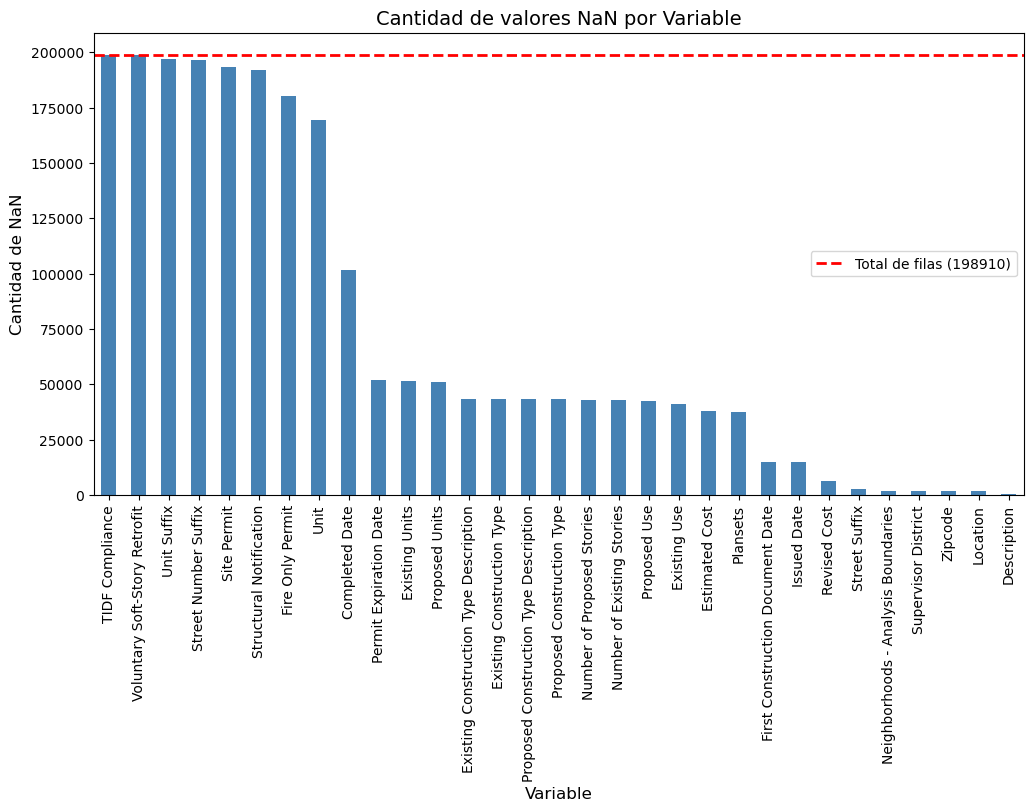

,Columna,NaN
0,TIDF Compliance,198908
1,Voluntary Soft-Story Retrofit,198875
2,Unit Suffix,196949
3,Street Number Suffix,196694
4,Site Permit,193550
5,Structural Notification,191988
6,Fire Only Permit,180082
7,Unit,169430
8,Completed Date,101715
9,Permit Expiration Date,51884


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Conteo de NaN por columna
nan_counts = df.isnull().sum()

# Filtramos solo las columnas que tengan al menos 1 NaN
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12,6))
nan_counts.plot(kind='bar', color='steelblue')

# Línea horizontal con el total de filas
plt.axhline(y=198910, color='red', linestyle='--', linewidth=2, label='Total de filas (198910)')

plt.title("Cantidad de valores NaN por Variable", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Cantidad de NaN", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Crear DataFrame con columna y cantidad de NaN
df_nan = pd.DataFrame({
    "Columna": nan_counts.index,
    "NaN": nan_counts.values
})

df_nan = df_nan.sort_values(by="NaN", ascending=False).reset_index(drop=True)

df_nan

# Evaluación de datos faltantes (por variable)

1. **TIDF Compliance (198,908 nulos)**  
   - Probablemente solo aplica a proyectos sujetos a regulaciones de *Transit Impact Development Fee*.  
   - La mayoría de permisos no requieren este cumplimiento, por lo que el campo queda vacío.  

2. **Voluntary Soft-Story Retrofit (198,875 nulos)**  
   - Aplica únicamente a edificios con vulnerabilidad sísmica (*soft-story buildings*).  
   - Como pocos permisos están en esta categoría, la mayoría no necesita este dato.  

3. **Unit Suffix (196,949 nulos)**  
   - Se usa para diferenciar unidades dentro de un mismo número de puerta (ej: A, B, C).  
   - Gran parte de las direcciones no tiene sufijo, por eso falta.  

4. **Street Number Suffix (196,694 nulos)**  
   - Similar al anterior, indica sub-números (ej: 100A, 100B).  
   - No todas las propiedades poseen sufijo, por lo que se encuentra vacío en la mayoría de los casos.  

5. **Site Permit (193,550 nulos)**  
   - Solo algunos proyectos requieren un *site permit* como permiso maestro.  
   - En los demás casos se emiten permisos individuales, quedando en blanco.  

6. **Structural Notification (191,988 nulos)**  
   - Campo relacionado con obras que modifican estructuras principales.  
   - Si el permiso es de menor escala, no requiere notificación estructural → NaN.  

7. **Fire Only Permit (180,082 nulos)**  
   - Aplica a intervenciones exclusivamente contra incendios.  
   - La mayoría de los permisos no son de este tipo → faltante.  

8. **Unit (169,430 nulos)**  
   - Identifica la unidad dentro de un edificio.  
   - Faltan porque no todos los permisos están ligados a unidades individuales (muchos son a nivel de edificio completo).  

9. **Completed Date (101,715 nulos)**  
   - Fecha de finalización del permiso.  
   - No aparece porque muchos proyectos aún no estaban finalizados al momento del registro.  

10. **Permit Expiration Date (51,884 nulos)**  
   - No todos los permisos tienen fecha de vencimiento (algunos son indefinidos o fueron completados antes).  

11. **Existing Units (51,543 nulos)**  
   - Número de unidades existentes antes del proyecto.  
   - Faltante en permisos donde no aplica (ej: reformas menores sin unidades residenciales).  

12. **Proposed Units (50,915 nulos)**  
   - Unidades propuestas tras el proyecto.  
   - Faltante en permisos que no involucran nuevas unidades (ej: remodelaciones).  

13. **Existing Construction Type Description (43,370 nulos)**  
   - Descripción del tipo de construcción existente.  
   - Puede faltar en registros incompletos o de baja complejidad.  

14. **Existing Construction Type (43,369 nulos)**  
   - Versión codificada de lo anterior.  
   - Misma explicación: en permisos más simples, no se registra.  

15. **Proposed Construction Type (43,165 nulos)**  
   - Tipo de construcción propuesta.  
   - Faltante cuando no se especifica un cambio de tipo constructivo.  

16. **Proposed Construction Type Description (43,165 nulos)**  
   - Detalle descriptivo de la propuesta.  
   - Misma lógica que el anterior.  

17. **Number of Proposed Stories (42,871 nulos)**  
   - Cantidad de pisos propuestos.  
   - Puede faltar en proyectos donde no hay cambios de altura.  

18. **Number of Existing Stories (42,788 nulos)**  
   - Número de pisos existentes.  
   - Faltante en registros incompletos o permisos menores sin inspección detallada.  

19. **Proposed Use (42,441 nulos)**  
   - Uso propuesto de la construcción (residencial, comercial, etc.).  
   - Ausente en permisos sin cambio de uso.  

20. **Existing Use (41,117 nulos)**  
   - Uso actual antes del permiso.  
   - Falta en casos de documentación incompleta.  

21. **Estimated Cost (38,068 nulos)**  
   - Estimación de costos inicial.  
   - Puede faltar en permisos preliminares o de muy baja magnitud.  

22. **Plansets (37,311 nulos)**  
   - Cantidad de planos entregados.  
   - Puede faltar si el permiso aún no requería planos o estaban pendientes.  

23. **First Construction Document Date (14,948 nulos)**  
   - Fecha del primer documento de construcción.  
   - No disponible en proyectos que no han iniciado formalmente.  

24. **Issued Date (14,942 nulos)**  
   - Fecha en que se emitió el permiso.  
   - Ausente en registros preliminares.  

25. **Revised Cost (6,066 nulos)**  
   - Costo revisado después de modificaciones.  
   - Solo aparece cuando hay ajustes al presupuesto, por eso muchos están vacíos.  

26. **Street Suffix (2,768 nulos)**  
   - Sufijo de la calle (ej: “St”, “Ave”).  
   - Faltante en direcciones mal registradas o incompletas.  

27. **Neighborhoods - Analysis Boundaries (1,725 nulos)**  
   - Barrio al que pertenece la dirección.  
   - Puede faltar por errores en la geocodificación de la ubicación.  

28. **Supervisor District (1,719 nulos)**  
   - Distrito de supervisión política.  
   - Faltante por errores de asignación o registros incompletos.  

29. **Zipcode (1,716 nulos)**  
   - Código postal.  
   - Puede faltar en direcciones incompletas o mal ingresadas.  

30. **Location (1,700 nulos)**  
   - Coordenadas de la obra.  
   - Faltante si no se georreferenció correctamente.  

31. **Description (290 nulos)**  
   - Descripción textual del proyecto.  
   - Falta en permisos cargados con información mínima o incompleta.

# 🛠️ Decisiones sobre tratamiento de datos faltantes

En base al análisis exploratorio, se detectó que **no existen duplicados** en el dataset.  
Por lo tanto, no es necesario aplicar limpieza en ese aspecto.  

A continuación se detallan las decisiones tomadas respecto a los **datos faltantes**, variable por variable:  

1. **TIDF Compliance**  
   - Mantener como `NaN` o reemplazar por "No aplica".  
   - Justificación: solo pocos permisos requieren esta regulación, dejarlo explícito ayuda a análisis futuros.  

2. **Voluntary Soft-Story Retrofit**  
   - Rellenar con "No aplica".  
   - Justificación: la mayoría de los edificios no están sujetos a esta condición.  

3. **Unit Suffix / Street Number Suffix / Unit**  
   - Rellenar con "Sin sufijo" o "Sin unidad".  
   - Justificación: faltan porque la mayoría de direcciones no poseen este detalle.  

4. **Site Permit / Structural Notification / Fire Only Permit**  
   - Rellenar con "No requerido".  
   - Justificación: solo aplica a casos especiales, es mejor marcarlo como ausente explícitamente.  

5. **Completed Date**  
   - Mantener `NaN`.  
   - Justificación: significa que el permiso no estaba finalizado, y es información útil.  

6. **Permit Expiration Date**  
   - Mantener `NaN`.  
   - Justificación: algunos permisos no tienen vencimiento, reflejarlo es correcto.  

7. **Existing Units / Proposed Units**  
   - Rellenar con 0 cuando no aplica.  
   - Justificación: la ausencia indica que no se agregan o no existen unidades.  

8. **Existing / Proposed Construction Type (+ descripción)**  
   - Mantener `NaN` o rellenar con "No especificado".  
   - Justificación: faltan en proyectos menores, pero es preferible dejar explícito que no está informado.  

9. **Number of Proposed Stories / Existing Stories**  
   - Rellenar con valores conocidos si es posible (ej: desde planos).  
   - En caso contrario, mantener `NaN`.  

10. **Proposed Use / Existing Use**  
   - Mantener `NaN` si no hay cambio de uso.  
   - Justificación: refleja que no se propuso un nuevo uso.  

11. **Estimated Cost / Revised Cost**  
   - Mantener `NaN` para proyectos sin costo estimado o revisado.  
   - Justificación: no imputar, porque no hay valor representativo.  

12. **Plansets**  
   - Mantener `NaN`.  
   - Justificación: si no se presentaron planos, no corresponde asignar valor artificial.  

13. **First Construction Document Date / Issued Date**  
   - Mantener `NaN` si aún no se emitieron.  
   - Justificación: dato ausente refleja etapa del proceso.  

14. **Street Suffix**  
   - Rellenar con "No especificado".  
   - Justificación: evita valores vacíos en direcciones.  

15. **Neighborhoods - Analysis Boundaries / Supervisor District / Zipcode / Location**  
   - Intentar completar mediante geocodificación externa si se requiere.  
   - En este análisis, mantener `NaN`.  

16. **Description**  
   - Rellenar con "Sin descripción".  
   - Justificación: garantiza que la variable quede uniforme para análisis de texto.  

---

## ✔️ Resumen de estrategia
- **Categorías especiales** (ej: permisos específicos) → Rellenar con `"No aplica"`.  
- **Campos de dirección** → Rellenar con `"Sin información"`.  
- **Fechas / Costos** → Mantener `NaN` porque indican estados del proceso o ausencia real de dato.  
- **Unidades / pisos** → Usar `0` cuando efectivamente no aplica.  
- **Texto descriptivo** → Rellenar con `"Sin descripción"`.  

# 📊 Decisiones sobre columnas con justificación

|                 Variable                 | Datos faltantes  | % sobre total  |                       Decisión                       |                                              Justificación                                              |
|:----------------------------------------:|:----------------:|:--------------:|:----------------------------------------------------:|:-------------------------------------------------------------------------------------------------------:|
|             TIDF Compliance              |     198,908      |      100%      |                     **Eliminar**                     |                     Nunca se registra, no aporta valor, toda la columna está vacía.                     |
|      Voluntary Soft-Story Retrofit       |     198,875      |     ~100%      |                     **Eliminar**                     |                       Campo de uso extremadamente específico, casi siempre vacío.                       |
|               Unit Suffix                |     196,949      |      99%       |                     **Eliminar**                     |             Sufijo de unidad casi nunca presente, no es relevante para el análisis global.              |
|           Street Number Suffix           |     196,694      |      99%       |                     **Eliminar**                     |                       Misma lógica que el anterior, información casi inexistente.                       |
|               Site Permit                |     193,550      |      97%       |                     **Eliminar**                     |                 Muy pocos registros lo usan, difícil de aprovechar en análisis general.                 |
|         Structural Notification          |     191,988      |      96%       |                     **Eliminar**                     |                     Solo aplica a casos puntuales, sin utilidad en análisis amplio.                     |
|             Fire Only Permit             |     180,082      |      90%       |                     **Eliminar**                     |                         Información extremadamente específica, poco analítica.                          |
|                   Unit                   |     169,430      |      85%       |      **Conservar (rellenar con “Sin unidad”)**       | Puede ser relevante en edificios con múltiples departamentos; conviene estandarizar aunque falte mucho. |
|              Completed Date              |     101,715      |      51%       |             **Conservar (mantener NaN)**             |              Ausencia significa que el proyecto aún no finalizó; los NaN son informativos.              |
|          Permit Expiration Date          |      51,884      |      26%       |             **Conservar (mantener NaN)**             |                     No todos los permisos expiran; dejar NaN refleja correctamente.                     |
|              Existing Units              |      51,543      |      26%       |     **Conservar (rellenar con 0 si no aplica)**      |      Importante para impacto demográfico; NaN indica ausencia de unidades → puede marcarse como 0.      |
|              Proposed Units              |      50,915      |      26%       |     **Conservar (rellenar con 0 si no aplica)**      |                       Similar a la anterior, clave para crecimiento habitacional.                       |
| Existing Construction Type / Description |      43,370      |      22%       |    **Conservar (rellenar con “No especificado”)**    |               Describe la situación inicial del edificio, relevante aunque falten datos.                |
| Proposed Construction Type / Description |      43,165      |      22%       |    **Conservar (rellenar con “No especificado”)**    |                              Importante para saber qué cambia con la obra.                              |
|        Number of Proposed Stories        |      42,871      |      22%       | **Conservar (mantener NaN o imputar si hay planos)** |             Fundamental para analizar verticalización; los NaN reflejan casos sin cambios.              |
|        Number of Existing Stories        |      42,788      |      22%       |             **Conservar (mantener NaN)**             |                         Igual que el anterior, dato clave sobre altura previa.                          |
|               Proposed Use               |      42,441      |      21%       |      **Conservar (rellenar con “Sin cambio”)**       |                Dato clave sobre destino del edificio; NaN significa que no hubo cambio.                 |
|               Existing Use               |      41,117      |      21%       |    **Conservar (rellenar con “No especificado”)**    |                       Necesario para caracterizar permisos por uso, aunque falte.                       |
|              Estimated Cost              |      38,068      |      19%       |             **Conservar (mantener NaN)**             |                        Dato económico crítico; algunos permisos no lo reportan.                         |
|                 Plansets                 |      37,311      |      19%       |             **Conservar (mantener NaN)**             |                  Útil para nivel de detalle; NaN indica que no se presentaron planos.                   |
|     First Construction Document Date     |      14,948      |       8%       |             **Conservar (mantener NaN)**             |                         Ausencia refleja permisos sin documentos iniciales aún.                         |
|               Issued Date                |      14,942      |       8%       |             **Conservar (mantener NaN)**             |                   Fecha clave; si falta, significa que aún no se emitió formalmente.                    |
|               Revised Cost               |      6,066       |       3%       |             **Conservar (mantener NaN)**             |                   Solo existe cuando hay cambios de presupuesto; NaN es informativo.                    |
|              Street Suffix               |      2,768       |       1%       |    **Conservar (rellenar con “No especificado”)**    |                                   Completa direcciones, pocos nulos.                                    |
|   Neighborhoods - Analysis Boundaries    |      1,725       |      0.8%      |             **Conservar (mantener NaN)**             |                 Muy útil para análisis espacial; pocos nulos no justifican eliminación.                 |
|           Supervisor District            |      1,719       |      0.8%      |             **Conservar (mantener NaN)**             |                           Información administrativa importante; pocos nulos.                           |
|                 Zipcode                  |      1,716       |      0.8%      |             **Conservar (mantener NaN)**             |                               Fundamental para localización; pocos nulos.                               |
|                 Location                 |      1,700       |      0.8%      |             **Conservar (mantener NaN)**             |                 Coordenadas geográficas clave; NaN refleja direcciones mal registradas.                 |
|               Description                |       290        |      0.1%      |    **Conservar (rellenar con “Sin descripción”)**    |                     Texto descriptivo valioso; casi todos los registros lo tienen.                      |



In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Reporte Exploratorio", explorative=True)
profile.to_notebook_iframe()   # Para verlo dentro del notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 43/43 [00:07<00:00,  5.54it/s]


KeyboardInterrupt: 